# Visualize the decoding results 

In [27]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from sktime.transformations.panel.rocket import Rocket

from param import *
from dataloader import UniformSegmentDataset


In [53]:
WT_list = [str(data_dir).split('/')[-1]  for data_dir in ParamDir().data_path_list if "KO" not in str(data_dir)]
data_name = WT_list[4]

with open(ParamDir().output_dir/data_name/"tsc_train_rocket_SVM_threshold_segment_False.pickle","rb") as f:
    original_results = pickle.load(f)

clf = original_results["estimator"]
(X_train, y_train), (X_test, y_test) = original_results["data"]

y_predicted = clf.predict(X_test)
    

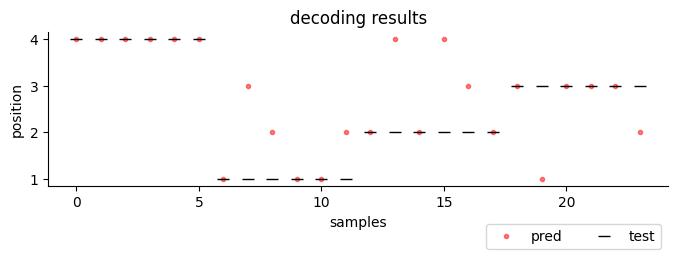

In [67]:
fig, ax = plt.subplots(figsize=(8,2))
sns.despine()
l1 = ax.plot([int(i) for i in y_predicted], "o", c="red", alpha=.5, markersize=3, label="pred")
l2 = ax.plot([int(i) for i in y_test], "_", c="black", markersize=8, label="test")

ax.set_yticks([1,2,3,4], labels=[1,2,3,4])
ax.set_xlabel("samples")
ax.set_ylabel("position")
ax.set_title("decoding results")

ax.legend(l1+l2, [i[0].get_label() for i in [l1, l2]], bbox_to_anchor=(1,-.2), ncol=2)

In [33]:
y_predicted

array(['2', '2', '2', '1', '3', '1', '4', '1'], dtype='<U1')

In [34]:
y_test

array(['2', '2', '1', '1', '3', '3', '4', '4'], dtype='<U1')